### Assignment-1 (IC-272)

In [76]:
##importing the primary libraries first

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Import the CSV Data as Pandas DataFrame

In [77]:
df = pd.read_csv('census2011.csv')

In [78]:
df.head()

,Ranking,District,State,Population,Growth,Sex-Ratio,Literacy
0,1,Thane,Maharashtra,"11,060,148",36.01 %,886,84.53
1,2,North Twenty Four Parganas,West Bengal,"10,009,781",12.04 %,955,84.06
2,3,Bangalore,Karnataka,"9,621,551",47.18 %,916,87.67
3,4,Pune,Maharashtra,"9,429,408",30.37 %,915,86.15
4,5,Mumbai Suburban,Maharashtra,"9,356,962",8.29 %,860,89.91


In [79]:
#to see the number of rows and columns
df.shape

(610, 7)

Min Literacy: 36.1
Max Literacy: 97.91


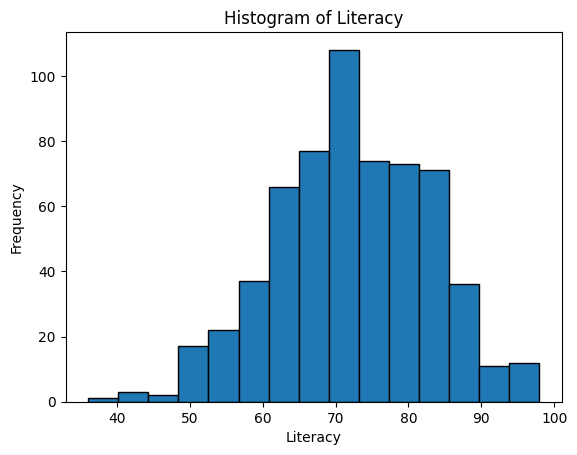

In [80]:
import matplotlib.pyplot as plt

min_val = df['Literacy'].min()
max_val = df['Literacy'].max()
print("Min Literacy:", min_val)
print("Max Literacy:", max_val)

# Create histogram with bin size = 15
plt.hist(df['Literacy'], bins=15, edgecolor='black')
plt.xlabel("Literacy")
plt.ylabel("Frequency")
plt.title("Histogram of Literacy")
plt.show()


#### Task 1: Data Preprocessing (50 points)
- Load and explore the Indian Districts Population dataset.
- Handle missing values and clean anomalies (e.g., invalid percentages).
- Create a target column by categorizing literacy as Low (< 65%), Medium (60–85%),
or High (> 85%).
- Encode categorical features, scale numeric variables, and split data into 70% training,
15% validation, and 15% test sets.
- Provide visualizations before and after preprocessing.

In [81]:
# checking missing values

df.isna().sum()

Ranking       0
District      0
State         0
Population    0
Growth        0
Sex-Ratio     0
Literacy      0
dtype: int64

In [82]:
df.dtypes

Ranking         int64
District       object
State          object
Population     object
Growth         object
Sex-Ratio       int64
Literacy      float64
dtype: object

In [83]:
# clean anomalies
if "Growth" in df.columns:
    df["Growth"] = (
        df["Growth"]
        .astype(str)                # ensure string
        .str.replace("%", "", regex=False)  # remove %
        .str.strip()                # remove spaces
    )
    df["Growth"] = pd.to_numeric(df["Growth"], errors="coerce")

negative_count = (df['Growth'] < 0).sum()
print(negative_count)

18


In [84]:
df['Growth'] = df['Growth'].apply(lambda x: df['Growth'].quantile(0.25) if x < 0 else x)

In [85]:
df.head()

,Ranking,District,State,Population,Growth,Sex-Ratio,Literacy
0,1,Thane,Maharashtra,"11,060,148",36.01,886,84.53
1,2,North Twenty Four Parganas,West Bengal,"10,009,781",12.04,955,84.06
2,3,Bangalore,Karnataka,"9,621,551",47.18,916,87.67
3,4,Pune,Maharashtra,"9,429,408",30.37,915,86.15
4,5,Mumbai Suburban,Maharashtra,"9,356,962",8.29,860,89.91


- creating a target column by categorizing literacy

In [86]:
def categorize(value):
        if pd.isna(value):
            return None
        elif value < 65:
            return "Low"
        elif 60 <= value <= 85:
            return "Medium"
        else:  # > 85
            return "High"

df["Target"] = df["Literacy"].apply(categorize)

Target
Medium    394
Low       148
High       68
Name: count, dtype: int64


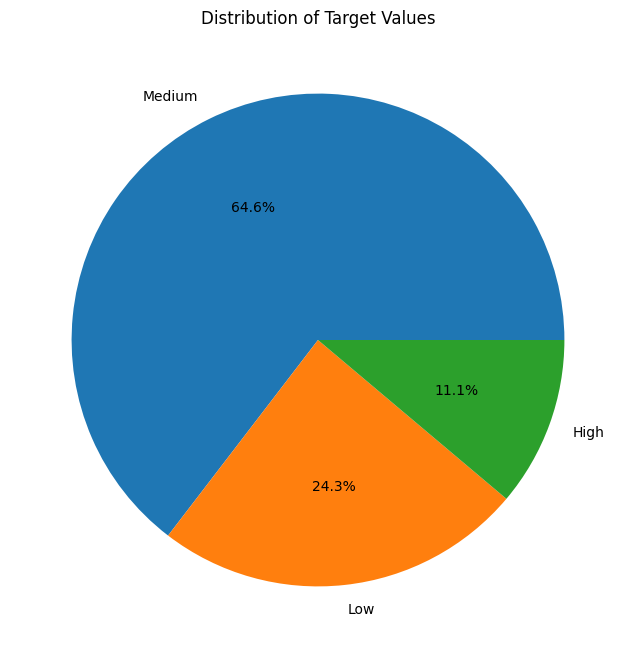

In [87]:
import matplotlib.pyplot as plt

target_counts = df['Target'].value_counts()
print(target_counts)

plt.figure(figsize=(8,8))
plt.pie(target_counts, labels=['Medium', 'Low', 'High'], autopct='%1.1f%%')
plt.title('Distribution of Target Values')
plt.show()

In [88]:
df.head()

,Ranking,District,State,Population,Growth,Sex-Ratio,Literacy,Target
0,1,Thane,Maharashtra,"11,060,148",36.01,886,84.53,Medium
1,2,North Twenty Four Parganas,West Bengal,"10,009,781",12.04,955,84.06,Medium
2,3,Bangalore,Karnataka,"9,621,551",47.18,916,87.67,High
3,4,Pune,Maharashtra,"9,429,408",30.37,915,86.15,High
4,5,Mumbai Suburban,Maharashtra,"9,356,962",8.29,860,89.91,High


### encoding step

- Drop District (too many categories, not meaningful for distance).
- Try OHE(one hot encoding) for states


In [89]:
# checking unique values in the District column
len(list(df['District'].unique()))

##as we can see there are a lot of districts making OHE encoding will create too many
##extra dimensions that will be not worth it as KNN relies on distance calculation
##and OHE will cause curse of dimensionality

604

In [90]:
df.drop('District', axis=1, inplace=True)

In [91]:
## we will also not need ranking to determine the literacy level
df.drop('Ranking', axis=1, inplace=True)

In [92]:
df.head()

,State,Population,Growth,Sex-Ratio,Literacy,Target
0,Maharashtra,"11,060,148",36.01,886,84.53,Medium
1,West Bengal,"10,009,781",12.04,955,84.06,Medium
2,Karnataka,"9,621,551",47.18,916,87.67,High
3,Maharashtra,"9,429,408",30.37,915,86.15,High
4,Maharashtra,"9,356,962",8.29,860,89.91,High


In [108]:
df['Population'] = df['Population'].str.replace(',', '').astype(int)

In [93]:
df_with_states = df.copy()  # keep original
df_with_states['Population'] = df_with_states['Population'].str.replace(',', '').astype(int)
df_with_states = df_with_states.drop(columns=['Literacy'])

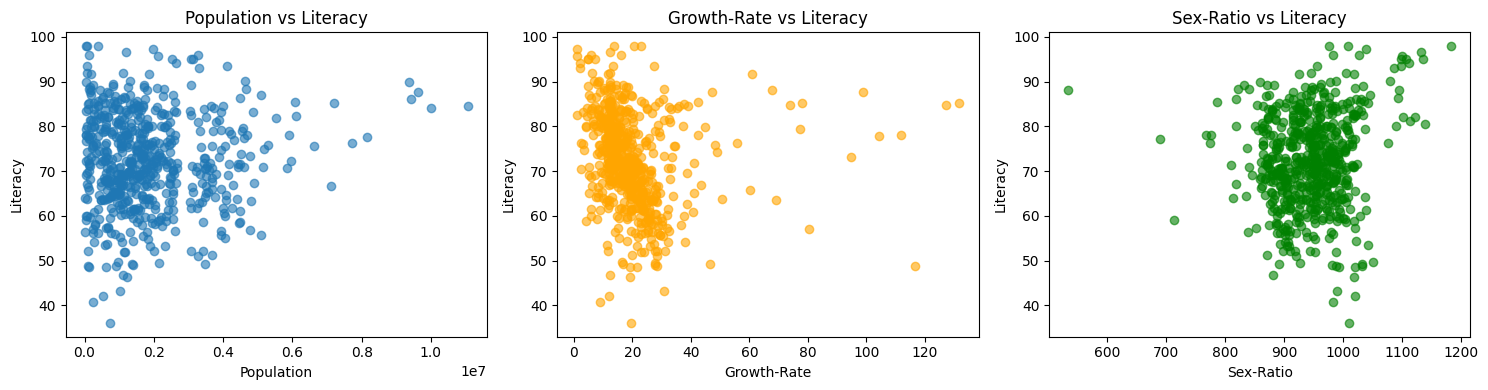

In [ ]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.scatter(df['Population'], df['Literacy'], alpha=0.6)
plt.xlabel("Population")
plt.ylabel("Literacy")
plt.title("Population vs Literacy")

plt.subplot(1, 3, 2)
plt.scatter(df['Growth'], df['Literacy'], alpha=0.6, color="orange")
plt.xlabel("Growth-Rate")
plt.ylabel("Literacy")
plt.title("Growth-Rate vs Literacy")

plt.subplot(1, 3, 3)
plt.scatter(df['Sex-Ratio'], df['Literacy'], alpha=0.6, color="green")
plt.xlabel("Sex-Ratio")
plt.ylabel("Literacy")
plt.title("Sex-Ratio vs Literacy")

plt.tight_layout()
plt.show()


#### firstly
- scale numeric values
- split the data into train test and validation

--------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------

### with states

--------------------------------------------------------------------------------------------

#### Task 2: KNN Classifier (50 points)
- Implement the K-Nearest Neighbors algorithm from scratch.
- Define a distance function, identify k nearest neighbors, and predict the majority
class.
- Train and evaluate the model using literacy categories as labels.
- Compare results for k = 3, 5, 7 using class distribution plots and confusion matrices.
- Employ k-fold cross-validation to assess model stability, keeping the 15% test set
fixed for final evaluation.

In [94]:
df.head()

,State,Population,Growth,Sex-Ratio,Literacy,Target
0,Maharashtra,"11,060,148",36.01,886,84.53,Medium
1,West Bengal,"10,009,781",12.04,955,84.06,Medium
2,Karnataka,"9,621,551",47.18,916,87.67,High
3,Maharashtra,"9,429,408",30.37,915,86.15,High
4,Maharashtra,"9,356,962",8.29,860,89.91,High


In [95]:
df_with_states

,State,Population,Growth,Sex-Ratio,Target
0,Maharashtra,11060148,36.0100,886,Medium
1,West Bengal,10009781,12.0400,955,Medium
2,Karnataka,9621551,47.1800,916,High
3,Maharashtra,9429408,30.3700,915,High
4,Maharashtra,9356962,8.2900,860,High
...,...,...,...,...,...
605,Andaman and Nicobar Islands,36842,12.3575,777,Medium
606,Arunachal Pradesh,35320,5.8700,889,Low
607,Himachal Pradesh,31564,12.3575,903,Medium
608,Arunachal Pradesh,21167,14.1900,839,Low


In [96]:
##apply OHE to the states
import pandas as pd


df_with_states = pd.get_dummies(df_with_states, columns=['State'])


X_with_states = df_with_states.drop(columns=['Target']).values
y_with_states = df_with_states['Target'].values

print("Shape of X_with_states:", X_with_states.shape)
print("Shape of y_with_states:", y_with_states.shape)

df_with_states

Shape of X_with_states: (610, 38)
Shape of y_with_states: (610,)


,Population,Growth,Sex-Ratio,Target,State_Andaman and Nicobar Islands,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chandigarh,...,State_Orissa,State_Puducherry,State_Punjab,State_Rajasthan,State_Sikkim,State_Tamil Nadu,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,11060148,36.0100,886,Medium,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10009781,12.0400,955,Medium,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,9621551,47.1800,916,High,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,9429408,30.3700,915,High,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,9356962,8.2900,860,High,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,36842,12.3575,777,Medium,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
606,35320,5.8700,889,Low,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
607,31564,12.3575,903,Medium,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
608,21167,14.1900,839,Low,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [97]:
# Separate numeric and categorical (OHE) features
numeric_cols = ["Population", "Growth", "Sex-Ratio"]
ohe_cols = [c for c in df_with_states.columns if c not in numeric_cols + ["Target"]]

# Scale only numeric
X_numeric = df_with_states[numeric_cols].values
mean_num = X_numeric.mean(axis=0)
std_num = X_numeric.std(axis=0)

X_numeric_scaled = (X_numeric - mean_num) / std_num

# Keep OHE as is
X_ohe = df_with_states[ohe_cols].values

# Combine back
import numpy as np
X_withState = np.hstack([X_numeric_scaled, X_ohe])
y_withState = df_with_states["Target"].values


In [118]:
import numpy as np

# Reproducibility
np.random.seed(17)

# Unique classes
classes = np.unique(y_withState)

train_idx, val_idx, test_idx = [], [], []

for c in classes:
    # indices of class c
    c_idx = np.where(y_withState == c)[0]
    np.random.shuffle(c_idx)
    
    n_c = len(c_idx)
    train_end = int(0.7 * n_c)
    val_end = int(0.85 * n_c)
    
    train_idx.extend(c_idx[:train_end])
    val_idx.extend(c_idx[train_end:val_end])
    test_idx.extend(c_idx[val_end:])

# Convert to arrays and shuffle inside each split
train_idx = np.array(train_idx)
val_idx   = np.array(val_idx)
test_idx  = np.array(test_idx)

np.random.shuffle(train_idx)
np.random.shuffle(val_idx)
np.random.shuffle(test_idx)

# Final splits
X_train_state = X_withState[train_idx]
y_train_state = y_withState[train_idx]

X_val_state = X_withState[val_idx]
y_val_state = y_withState[val_idx]

X_test_state = X_withState[test_idx]
y_test_state = y_withState[test_idx]

print("Train:", X_train_state.shape, y_train_state.shape)
print("Val:", X_val_state.shape, y_val_state.shape)
print("Test:", X_test_state.shape, y_test_state.shape)


Train: (425, 38) (425,)
Val: (91, 38) (91,)
Test: (94, 38) (94,)


--------------------------------------------------------------------------------------------

### Creating the functions to implement the K-Nearest Algo from scratch

--------------------------------------------------------------------------------------------

In [119]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(X_train, y_train, X_test, k=3):
    y_pred = []
    
    for test_point in X_test:
    
        distances = np.linalg.norm(X_train - test_point, axis=1)
        k_indices = np.argsort(distances)[:k]
        k_labels = [y_train[i] for i in k_indices]
        
    
        label_counts = {}
        for label in k_labels:
            if label in label_counts:
                label_counts[label] += 1
            else:
                label_counts[label] = 1
        
        most_common_label = max(label_counts, key=label_counts.get)
        y_pred.append(most_common_label)
    
    return np.array(y_pred)

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def confusion_matrix(y_true, y_pred):
    labels = np.unique(y_true)
    matrix = np.zeros((len(labels), len(labels)), dtype=int)
    label_to_index = {label: i for i, label in enumerate(labels)}
    
    for true, pred in zip(y_true, y_pred):
        matrix[label_to_index[true], label_to_index[pred]] += 1
        
    return matrix, labels


In [120]:
#with states
y_pred2 = knn_predict(X_train_state, y_train_state, X_val_state, k=7)
print(f"{accuracy(y_val_state,y_pred2)*100}%")

71.42857142857143%


In [121]:
ks2 = [3, 5, 7]
for k in ks2:
    y_val_pred2 = knn_predict(X_train_state, y_train_state, X_val_state, k)
    acc = accuracy(y_val_state, y_val_pred2)
    print(f"Validation Accuracy with states for k={k}: {acc:.4f}")


Validation Accuracy with states for k=3: 0.7253
Validation Accuracy with states for k=5: 0.7143
Validation Accuracy with states for k=7: 0.7143


In [122]:
best_k = 3
y_val_predCM = knn_predict(X_train_state, y_train_state, X_val_state, best_k)
cm, labels = confusion_matrix(y_val_state, y_val_predCM)

In [130]:
k5 = 5
y_val_predCM5 = knn_predict(X_train_state, y_train_state, X_val_state, k5)
cm5, labels = confusion_matrix(y_val_state, y_val_predCM5)

In [131]:
k7 = 7
y_val_predCM7 = knn_predict(X_train_state, y_train_state, X_val_state, k7)
cm7, labels = confusion_matrix(y_val_state, y_val_predCM7)

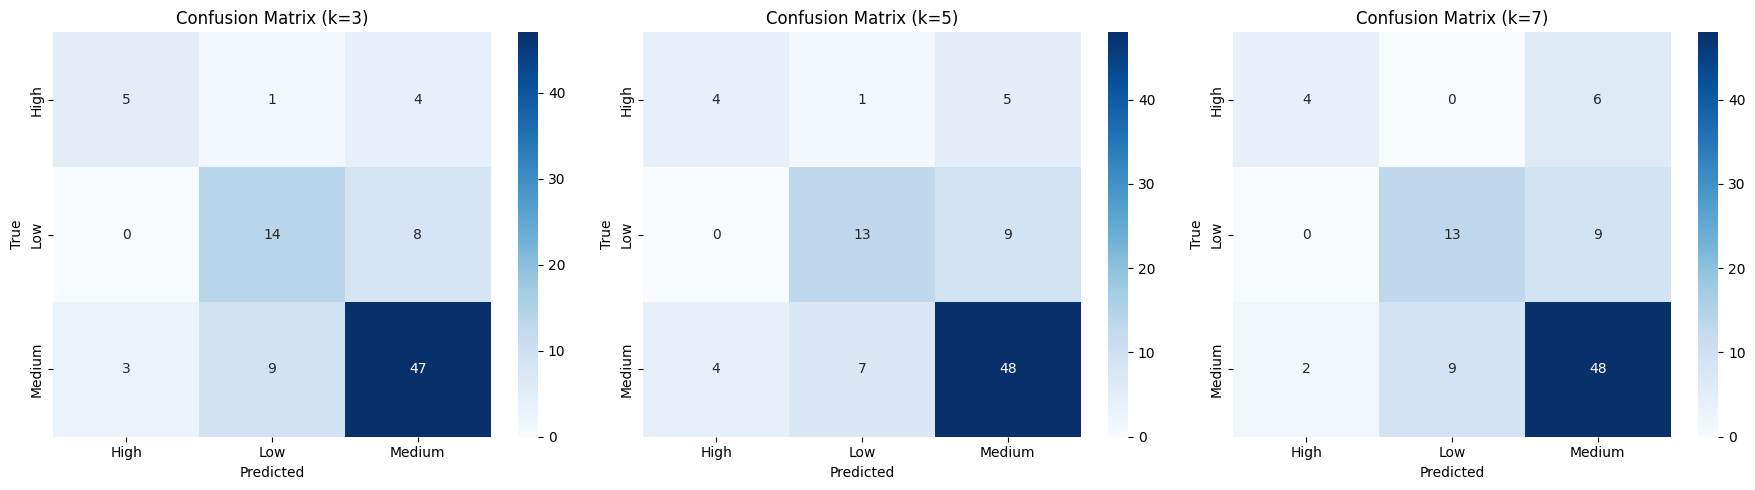

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues", ax=axes[0])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")
axes[0].set_title(f"Confusion Matrix (k={best_k})")

sns.heatmap(cm5, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues", ax=axes[1])
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")
axes[1].set_title(f"Confusion Matrix (k={k5})")

sns.heatmap(cm7, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues", ax=axes[2])
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("True")
axes[2].set_title(f"Confusion Matrix (k={k7})")

plt.tight_layout()
plt.show()

In [134]:
ks2 = [3, 5, 7]
for k in ks2:
    y_val_pred3 = knn_predict(X_train_state, y_train_state, X_test_state, k)
    acc = accuracy(y_test_state, y_val_pred3)
    print(f"Test Accuracy with states for k={k}: {acc:.4f}")


Test Accuracy with states for k=3: 0.7447
Test Accuracy with states for k=5: 0.7234
Test Accuracy with states for k=7: 0.7340


Test Accuracy with states for k=3: 0.7447
Test Accuracy with states for k=5: 0.7234
Test Accuracy with states for k=7: 0.7340


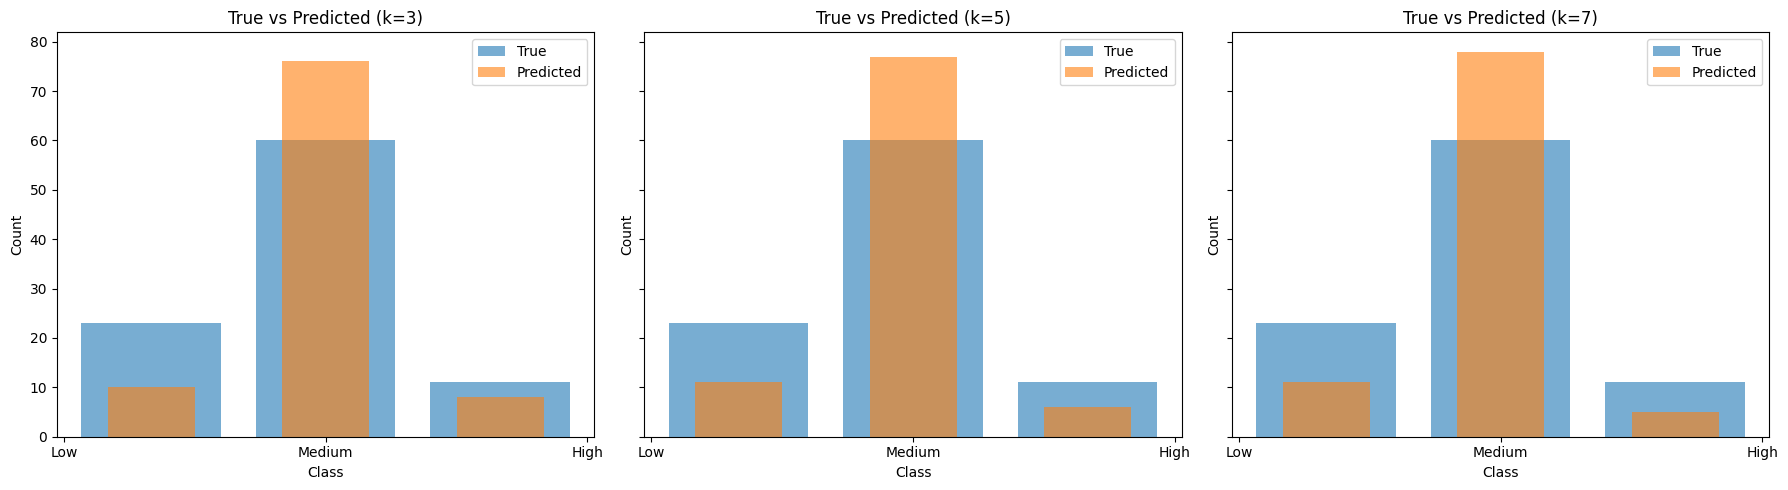

In [135]:
import matplotlib.pyplot as plt

ks2 = [3, 5, 7]
predictions = {}

# Run predictions and store
for k in ks2:
    y_pred = knn_predict(X_train_state, y_train_state, X_test_state, k)
    predictions[k] = y_pred
    acc = accuracy(y_test_state, y_pred)
    print(f"Test Accuracy with states for k={k}: {acc:.4f}")

# Plot histograms side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, k in enumerate(ks2):
    axes[i].hist(y_test_state, bins=len(np.unique(y_test_state)), alpha=0.6, label="True", rwidth=0.8)
    axes[i].hist(predictions[k], bins=len(np.unique(y_test_state)), alpha=0.6, label="Predicted", rwidth=0.5)
    axes[i].set_title(f"True vs Predicted (k={k})")
    axes[i].set_xlabel("Class")
    axes[i].set_ylabel("Count")
    axes[i].legend()

plt.tight_layout()
plt.show()
